Salary of top 6 Data roles and Data skills.

Methodology
1- First, we will compute median for top 6 Data Roles.
2- Secondly,  we will compute median fot top 6 skills of Data Analysts.
3- Thirdly, we will plot the graph by combining two graphe: 1 for data roles and 2 for data skills of Data Analysts.

In [1]:
# Importing Libraries
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

c:\Users\hamza\anaconda3\envs\myenv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Using the latest cached version of the dataset since lukebarousse/data_jobs couldn't be found on the Hugging Face Hub
Found the latest cached dataset configuration 'default' at C:\Users\hamza\.cache\huggingface\datasets\lukebarousse___data_jobs\default\0.0.0\ed776e5a0a8c40ea9d5efbd800772ae52e140f3e (last modified on Tue Sep  2 16:00:35 2025).


In [3]:
# filter for the job titles and country
df_US = df[(df['job_country'] == 'United States')].dropna(subset=['salary_year_avg'])

In [6]:
#Now we will create a list and add top 6 Job titles in it
job_titles = df_US['job_title_short'].value_counts().index[:6].tolist()

In [7]:
job_titles

['Data Scientist',
 'Data Analyst',
 'Data Engineer',
 'Senior Data Scientist',
 'Senior Data Engineer',
 'Senior Data Analyst']

In [11]:
df_US_top6 = df_US[df_US['job_title_short'].isin(job_titles)]
job_order = df_US_top6.groupby('job_title_short')['salary_year_avg'].median().sort_values(ascending=False).index

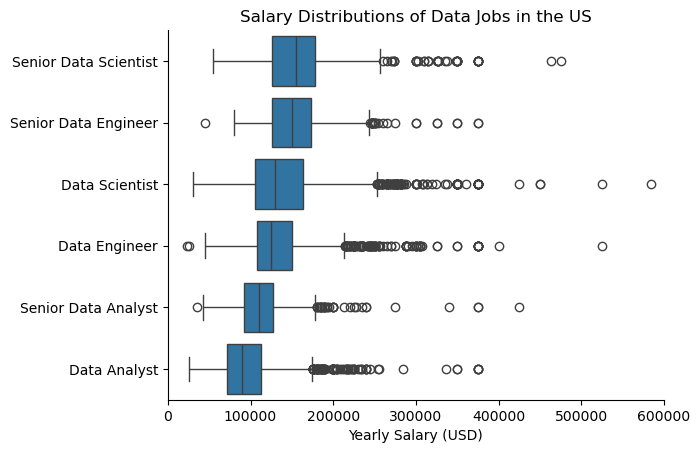

In [17]:
sns.boxplot(data=df_US_top6, x='salary_year_avg', y='job_title_short', order=job_order)
plt.title('Salary Distributions of Data Jobs in the US')
plt.xlabel('Yearly Salary (USD)')
plt.ylabel('')
plt.xlim(0, 600000)
ticks_x = plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K')

sns.despine()




Now will plot graph for top 6 skills for data analysts according to highest pay and top 6 skills most demanded for data analysts in US

In [22]:
df_DA_US = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()
df_DA_US = df_DA_US = df_DA_US.dropna(subset=['salary_year_avg'])
df_DA_US = df_DA_US.explode('job_skills')
df_DA_US[['salary_year_avg', 'job_skills']].head(11)


,salary_year_avg,job_skills
109,89000.0,python
109,89000.0,r
109,89000.0,alteryx
109,89000.0,tableau
180,90250.0,excel
180,90250.0,powerpoint
410,133285.0,sql
410,133285.0,word
410,133285.0,excel
410,133285.0,visio


In [23]:
#For top pay
df_DA_top_pay = df_DA_US.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='median', ascending=False)

df_DA_top_pay = df_DA_top_pay.head(10)

df_DA_top_pay

,count,median
job_skills,,
dplyr,2,196250.0
bitbucket,3,189000.0
gitlab,3,186000.0
solidity,1,179000.0
hugging face,1,175000.0
couchbase,1,160515.0
ansible,1,159640.0
mxnet,2,149000.0
cassandra,6,148250.0


In [42]:
#For top demand
df_DA_skills  = df_DA_US.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='count', ascending=False)

df_DA_skills = df_DA_skills.head(6).sort_values(by='median', ascending=False)

df_DA_skills 

,count,median
job_skills,,
python,1431,97500.0
tableau,1364,92875.0
r,893,92500.0
sql,2508,91000.0
sas,926,90000.0
excel,1808,84392.0


C:\Users\hamza\AppData\Local\Temp\ipykernel_17452\796816567.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\hamza\AppData\Local\Temp\ipykernel_17452\796816567.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


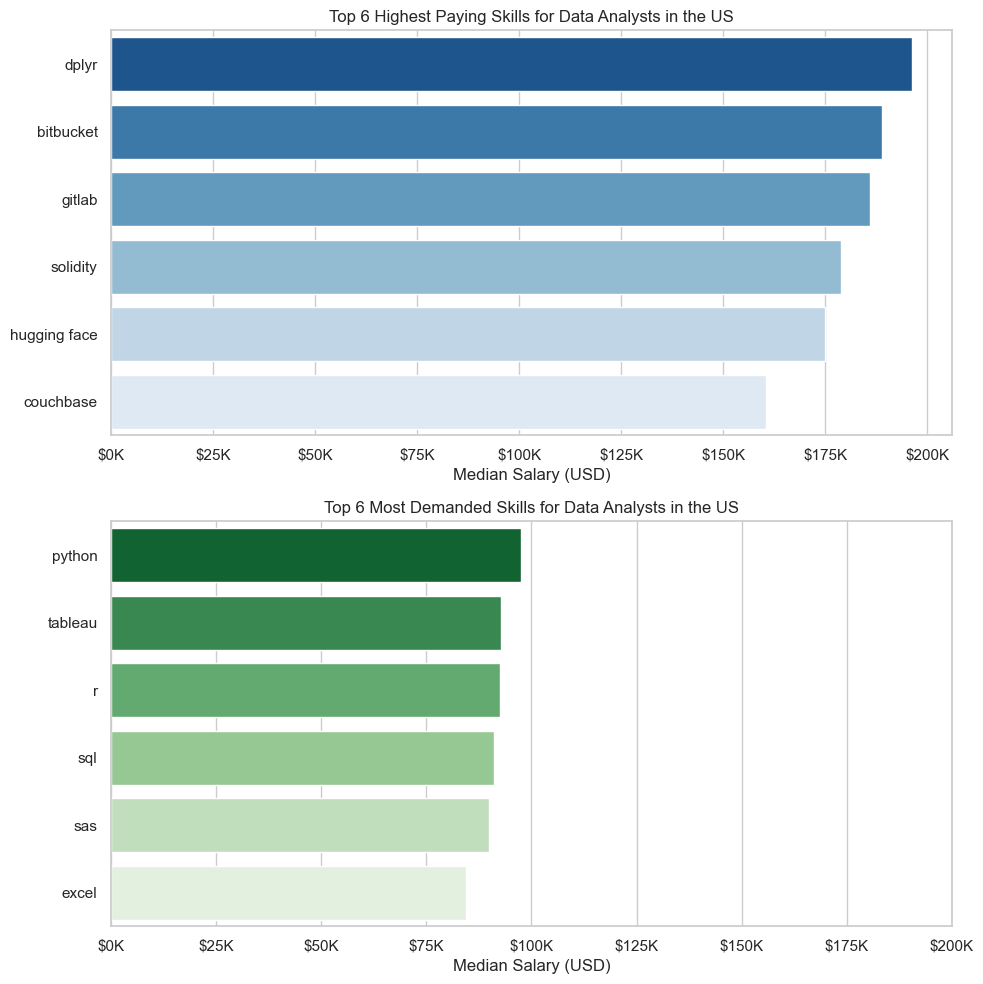

In [43]:
# --- Plot setup ---
fig, axes = plt.subplots(2, 1, figsize=(10, 10))
sns.set_theme(style='whitegrid')

# --- 1️⃣ Top 6 Highest Paying Skills ---
sns.barplot(
    x='median', 
    y=df_DA_top_pay.index, 
    data=df_DA_top_pay, 
    ax=axes[0], 
    palette='Blues_r'
)
axes[0].set_title('Top 6 Highest Paying Skills for Data Analysts in the US')
axes[0].set_xlabel('Median Salary (USD)')
axes[0].set_ylabel('')
axes[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))

# --- 2️⃣ Top 6 Most Demanded Skills (showing their salaries) ---
sns.barplot(
    x='median', 
    y=df_DA_skills.index, 
    data=df_DA_skills, 
    ax=axes[1], 
    palette='Greens_r'
)
axes[1].set_title('Top 6 Most Demanded Skills for Data Analysts in the US')
axes[1].set_xlabel('Median Salary (USD)')
axes[1].set_ylabel('')
axes[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))
plt.xlim(0, 200000)

# --- Layout ---
plt.tight_layout()
plt.show()